This file runs SOMDE (https://doi.org/10.1093/bioinformatics/btab471) on MERFISH mouse whole brain coronal section datasets. Aggregated datasets are saved such that nnSVG can be performed on them in R.

Tutorials for SOMDE: https://pypi.org/project/somde/#description

In [1]:
## set up
import numpy as np;
import pandas as pd;
from somde import SomNode
import time

In [2]:
## load dataset
dataset_name = "merfish_mouseBrain"

# genes-by-cells matrix
counts = pd.read_csv("../outputs/"+dataset_name+"_counts.csv", sep=",", index_col=0)
lognorm = pd.read_csv("../outputs/"+dataset_name+"_lognorm.csv", sep=",", index_col=0)

# x,y coordinates
pos_cells = pd.read_csv("../outputs/"+dataset_name+"_pos.csv", sep=",", index_col=0)

In [3]:
X = pos_cells[["x", "y"]].values.astype(np.float32)

Tutorial

In [4]:
## compute k based on the number of notes (aggregated spatial points) we want
# k = neighbor number (expected average number of original data sites each SOM node represents)
n_node = 4896
k = pos_cells.shape[0]//4896
k

17

In [5]:
## train self-organizing map (SOM) nodes
som = SomNode(X, k=k)

using 70*70 SOM nodes for 83546 points


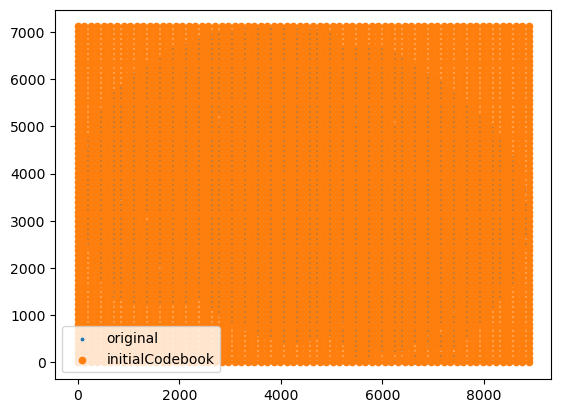

In [6]:
## visualize initial SOM nodes
som.viewIniCodebook()

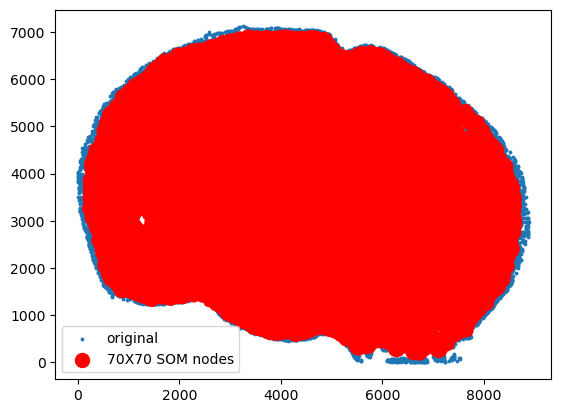

In [7]:
## visualize trained SOM nodes
som.view()

In [8]:
## aggregate single-cell info (counts)
som_counts, som_pos_counts = som.mtx(counts)

In [9]:
## aggregate single-cell info (lognorm)
som_lognorm, som_pos_lognorm = som.mtx(lognorm)

In [10]:
## sanity check
som_pos_counts[["x","y"]].equals(som_pos_lognorm[["x","y"]])

True

In [11]:
node_names = ["node{}".format(i+1) for i in range(som_lognorm.shape[1])]
som_lognorm.columns = node_names
som_pos_lognorm.index = node_names

In [12]:
som_lognorm

,node1,node2,node3,node4,node5,node6,node7,node8,node9,node10,...,node4889,node4890,node4891,node4892,node4893,node4894,node4895,node4896,node4897,node4898
Oxgr1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.113607,0.379151,0.127764,0.000000,0.171639,0.000000,0.201332,0.146917,0.128263
Htr1a,0.273119,0.804844,0.386743,0.378961,0.303951,0.486857,0.420763,0.563907,0.312319,0.371776,...,0.286853,0.345229,0.369270,0.000000,0.201298,0.315547,0.188101,0.345130,0.255937,0.413193
Htr1b,0.131474,0.409390,0.405422,0.606712,0.561445,0.573941,0.416459,0.383081,0.375204,0.478610,...,0.440663,0.200581,0.000000,0.230510,0.345453,0.243999,0.000000,0.118565,0.153157,0.464152
Htr1d,0.000000,0.000000,0.000000,0.506217,0.119143,0.000000,0.249296,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Htr1f,0.194003,0.430977,0.000000,0.150748,0.188499,0.000000,0.125221,0.000000,0.000000,0.000000,...,0.339965,0.000000,0.258537,0.000000,0.000000,0.403680,0.000000,0.000000,0.201227,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ros1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.150165,0.000000,0.000000,0.000000,0.000000,0.272593,0.000000,0.000000
Ryk,0.554430,0.845654,0.750247,0.634508,0.627928,0.701645,0.630192,0.685567,0.530723,0.713640,...,0.837933,0.698748,0.790212,0.541591,0.649868,0.930503,0.548906,0.856982,1.006474,0.846819
Tek,0.440583,0.271724,0.271092,0.291817,0.247225,0.548723,0.308435,0.000000,0.000000,0.361622,...,0.402848,0.476093,0.156318,0.169324,0.438702,0.374917,0.526364,0.440274,0.219033,0.268879
Tie1,0.257822,0.404613,0.326076,0.491046,0.080267,0.249310,0.222443,0.000000,0.343174,0.434474,...,0.153677,0.238573,0.000000,0.000000,0.423014,0.000000,0.431173,0.234597,0.308920,0.185758


In [13]:
som_pos_lognorm

,x,y,total_count
node1,1459.959595,1313.17981,105.602751
node2,1523.676636,1343.404541,123.086579
node3,1596.672485,1367.690308,114.289465
node4,1669.561279,1368.623413,142.838034
node5,1749.805542,1363.182373,129.949651
...,...,...,...
node4894,6652.305664,6109.285645,129.213793
node4895,6715.868164,6071.536133,105.216959
node4896,6770.061035,6023.009277,106.417530
node4897,6832.564941,6002.72168,94.643242


Run SOMDE to aggregate single-cell info into the number of nodes that roughly matches the number of spatial pixels at 50 um, 100 um, 200 um, 400 um.

In [14]:
## set number of spatial points for each resolution
# test
# n_sp_dict = {
#     100: 4896,
#     400: 342
# }

# manual
# n_sp_dict = {
#     50: 18509,
#     100: 4896,
#     200: 1268,
#     400: 342
# }

# csv file from R codes
start_res = "50"
end_res = "400"
interval_res = "10"
num_pixels = pd.read_csv("../outputs/"+dataset_name+"_num_pixels_"+start_res+"-"+end_res+"-by-"+interval_res+".csv", sep=",", index_col=0)
n_sp_dict = pd.Series(num_pixels.num_pixels.values, index = num_pixels.resolution).to_dict()
n_sp_dict

{50: 18515,
 60: 13152,
 70: 9773,
 80: 7542,
 90: 5993,
 100: 4881,
 110: 4054,
 120: 3420,
 130: 2928,
 140: 2532,
 150: 2216,
 160: 1953,
 170: 1738,
 180: 1557,
 190: 1403,
 200: 1269,
 210: 1154,
 220: 1058,
 230: 971,
 240: 894,
 250: 827,
 260: 766,
 270: 715,
 280: 666,
 290: 624,
 300: 586,
 310: 550,
 320: 517,
 330: 488,
 340: 461,
 350: 436,
 360: 413,
 370: 395,
 380: 374,
 390: 357,
 400: 339}

In [15]:
## initialize a DataFrame to hold runtime data
runtime_list = []

In [16]:
## perform SOMDE to aggregate single-cell info into n spatial points
for key in n_sp_dict:
    print("Resolution: "+str(key))

    ## compute k
    k = pos_cells.shape[0]//n_sp_dict[key]
    
    ## train self-organizing map (SOM) nodes
    start1 = time.time()
    som = SomNode(X, k=k)
    end1 = time.time()
    runtime_list.append({'resolution': key, 'operation': 'SomNode', 'runtime': end1 - start1})

    ## aggregate
    start2 = time.time()
    counts_nodes, pos_nodes = som.mtx(counts)
    end2 = time.time()
    runtime_list.append({'resolution': key, 'operation': 'mtx_counts', 'runtime': end2 - start2})

    start3 = time.time()
    lognorm_nodes, pos_nodes = som.mtx(lognorm)
    end3 = time.time()
    runtime_list.append({'resolution': key, 'operation': 'mtx_lognorm', 'runtime': end3 - start3})

    ## change column names and indexes
    node_names = ["node{}".format(i+1) for i in range(counts_nodes.shape[1])]
    counts_nodes.columns = node_names
    lognorm_nodes.columns = node_names
    pos_nodes.index = node_names

    ## save outputs
    counts_nodes.to_csv("../outputs/"+dataset_name+"_resolution_"+str(key)+"_counts_nodes.csv")
    lognorm_nodes.to_csv("../outputs/"+dataset_name+"_resolution_"+str(key)+"_lognorm_nodes.csv")
    pos_nodes[["x","y"]].to_csv("../outputs/"+dataset_name+"_resolution_"+str(key)+"_pos_nodes.csv")

## save runtime
runtime_df = pd.DataFrame(runtime_list)
runtime_df.to_csv("../outputs/"+dataset_name+"_runtime_somde.csv")

Resolution: 50
using 144*144 SOM nodes for 83546 points
Resolution: 60
using 118*118 SOM nodes for 83546 points
Resolution: 70
using 102*102 SOM nodes for 83546 points
Resolution: 80
using 87*87 SOM nodes for 83546 points
Resolution: 90
using 80*80 SOM nodes for 83546 points
Resolution: 100
using 70*70 SOM nodes for 83546 points
Resolution: 110
using 64*64 SOM nodes for 83546 points
Resolution: 120
using 59*59 SOM nodes for 83546 points
Resolution: 130
using 54*54 SOM nodes for 83546 points
Resolution: 140
using 51*51 SOM nodes for 83546 points
Resolution: 150
using 47*47 SOM nodes for 83546 points
Resolution: 160
using 44*44 SOM nodes for 83546 points
Resolution: 170
using 41*41 SOM nodes for 83546 points
Resolution: 180
using 39*39 SOM nodes for 83546 points
Resolution: 190
using 37*37 SOM nodes for 83546 points
Resolution: 200
using 35*35 SOM nodes for 83546 points
Resolution: 210
using 34*34 SOM nodes for 83546 points
Resolution: 220
using 32*32 SOM nodes for 83546 points
Resolutio